In [3]:
#### Import libraries:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#### Short segment - Analyzing All Skiers:

In [4]:
# Load and clean FIS_data.csv for analysis of all Skiers
all_countries = pd.read_csv('path/to/fis_data.csv')

# Keep only the necessary columns for further analysis
all_countries = all_countries[['Competitorid', 'Competitorname', 'Gender', 'Nationcode', 'Skiclub', 'HPpoints', 'HPpos']]
all_countries = all_countries.dropna(subset=['Competitorid', 'Competitorname', 'Gender', 'Nationcode', 'Skiclub', 'HPpoints', 'HPpos'])

Count of Top Scorers by Country:
USA: 29
CHN: 10
SUI: 4
JPN: 4
FRA: 3
CAN: 2
GER: 2
KOR: 2
BRA: 1
FIN: 1
EST: 1


/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_96738/414228026.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Top Scorers', data=top_scorers_df, palette='viridis')


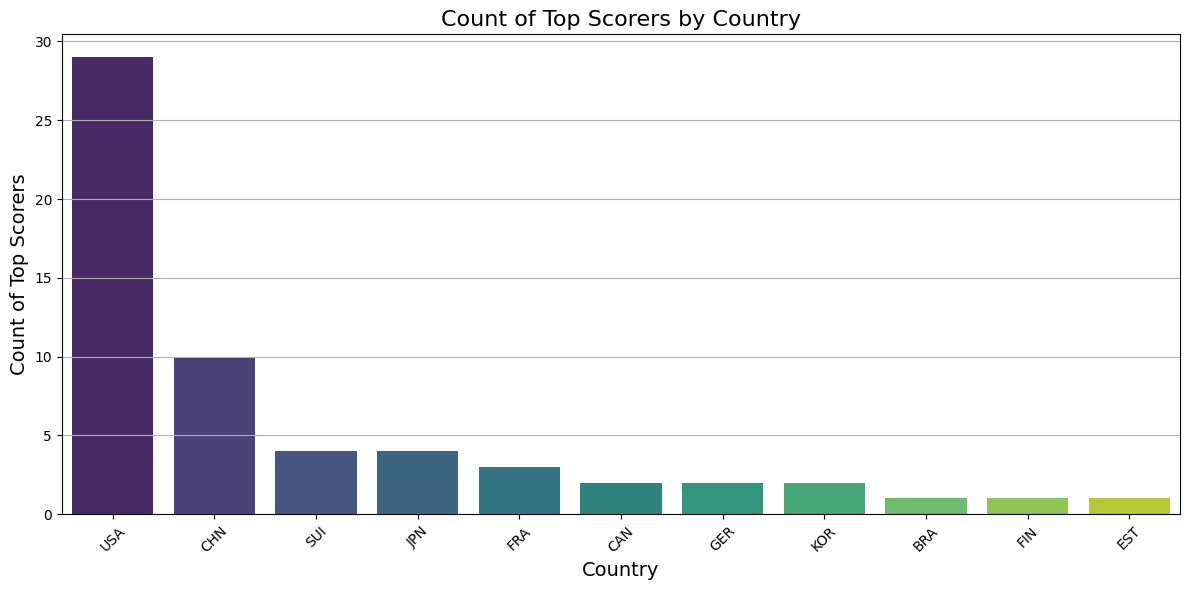

In [28]:
# Calculate the 75th percentile threshold for HP points
threshold = all_countries['HPpoints'].quantile(0.75)  

# Create DataFrame of competitors who have HPpoints greater than or equal to the threshold
top_scorers = all_countries[all_countries['HPpoints'] >= threshold]

# Count the number of top scorers per country
top_scorers_count = top_scorers['Nationcode'].value_counts()

print("Count of Top Scorers by Country:")
for country, count in top_scorers_count.items():
    print(f"{country}: {count}")
    
# Identify the country with the most top scorers
most_top_scorers_country = top_scorers_count.idxmax()

# Get the count of top scorers for that country
most_top_scorers_count = top_scorers_count.max()

top_scorers_df = top_scorers_count.reset_index()
top_scorers_df.columns = ['Country', 'Top Scorers']  # Rename columns for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Top Scorers', data=top_scorers_df, palette='viridis')
plt.title('Count of Top Scorers by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of Top Scorers', fontsize=14)
plt.xticks(rotation=45) 
plt.grid(axis='y') 
plt.tight_layout()  
plt.savefig('Top_scorers_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#### Analyzing All US Skiers Only:

In [29]:
# Load all_US_skiers.csv for analysis of all US Skiers
all_US = pd.read_csv('all_US_skiers.csv')

Mean HP Points by Gender:
M: 91.05
W: 106.44

Count of Competitors by Gender:
M: 52
W: 32


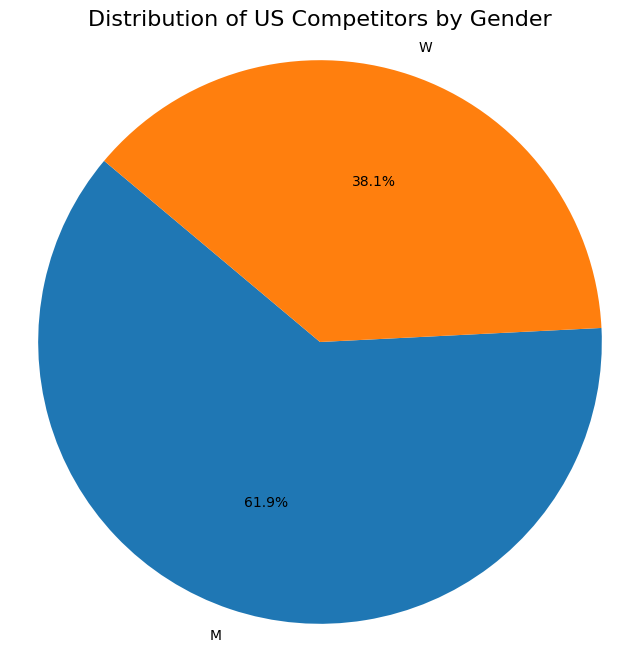

In [32]:
# Calculate the mean HP points by Gender
points = all_US.groupby('Gender')['HPpoints'].mean()

# Count the number of competitors by Gender
gender_counts = all_US['Gender'].value_counts()

print("Mean HP Points by Gender:")
for gender, mean_points in points.items():
    print(f"{gender}: {mean_points:.2f}")  # Format to 2 decimal places

print("\nCount of Competitors by Gender:")
for gender, count in gender_counts.items():
    print(f"{gender}: {count}")

plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of US Competitors by Gender', fontsize=16)
plt.axis('equal') 
plt.savefig('US_Competitors_by_Gender.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_96738/3502183632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='HPpoints', data=all_US, palette='pastel')


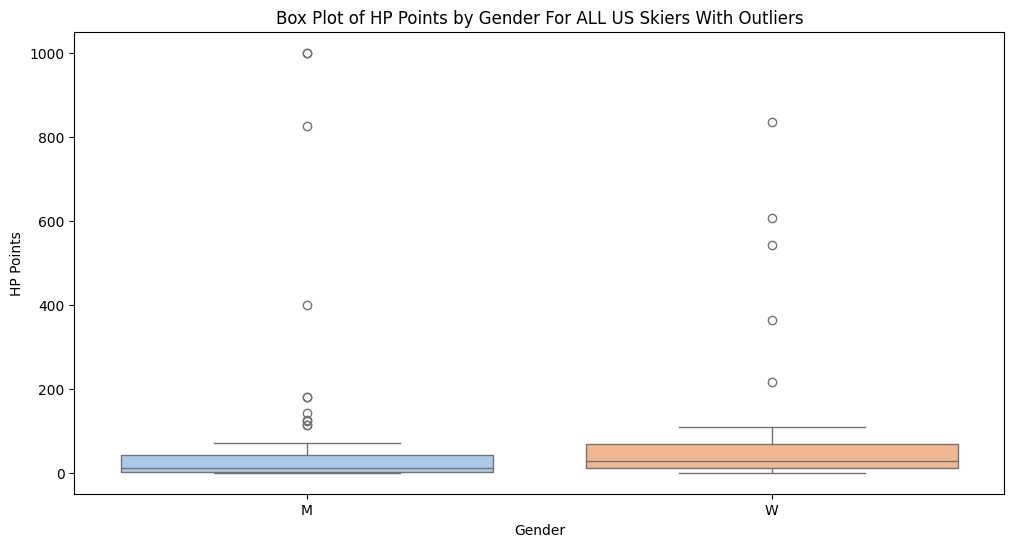

In [34]:
# Visualize distribution of HP points by gender of all US Skiers (WITH OUTLIERS)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='HPpoints', data=all_US, palette='pastel')
plt.title('Box Plot of HP Points by Gender For ALL US Skiers With Outliers')
plt.xlabel('Gender')
plt.ylabel('HP Points')
plt.savefig('Points_by_gender_of_all_US_Outliers.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_96738/4262163780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='HPpoints', data=all_US, palette='pastel', showfliers=False)  # Hide outliers


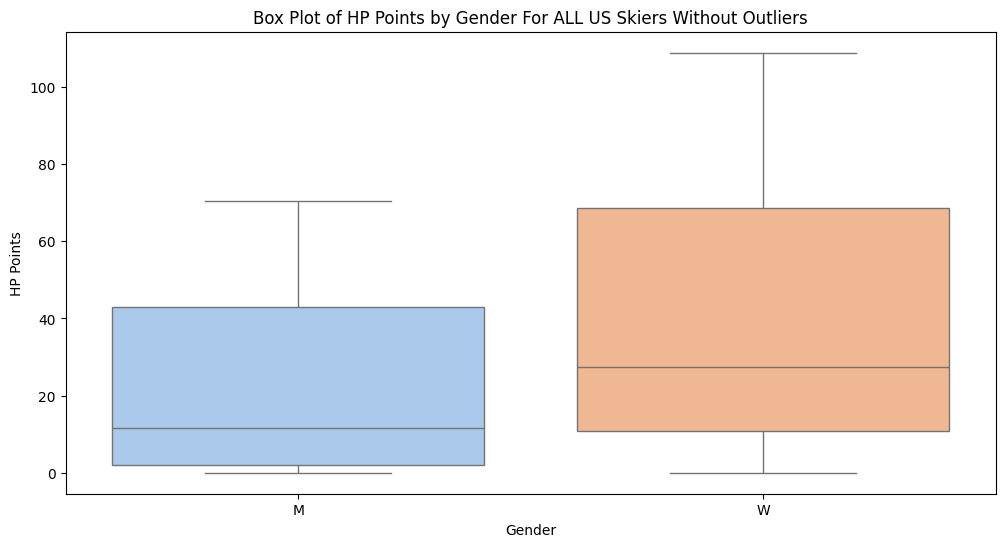

In [35]:
# Visualize distribution of HP points by gender of all US Skiers (WITH OUTLIERS)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='HPpoints', data=all_US, palette='pastel', showfliers=False)  # Hide outliers
plt.title('Box Plot of HP Points by Gender For ALL US Skiers Without Outliers')
plt.xlabel('Gender')
plt.ylabel('HP Points')
plt.savefig('Points_by_gender_of_all_US_WO_Outliers.png', dpi=300, bbox_inches='tight')
plt.show()

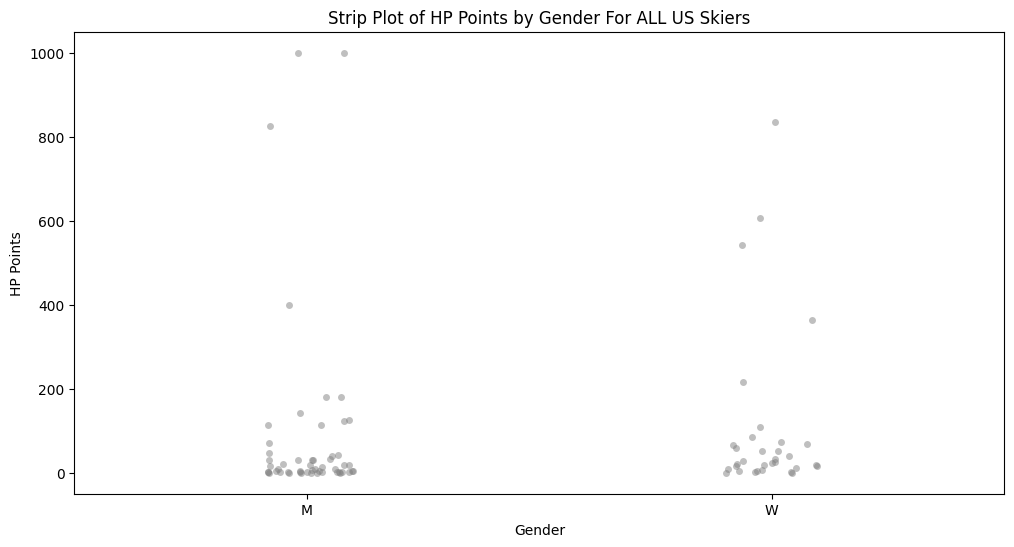

In [37]:
# Create a strip plot to visualize individual data points for HP points by Gender for all US Skiers

plt.figure(figsize=(12, 6))  # Set the figure size to 12 inches wide and 6 inches tall
sns.stripplot(
    x='Gender',               
    y='HPpoints',               
    data=all_US,           
    color='gray',              
    alpha=0.5                  
)
plt.title('Strip Plot of HP Points by Gender For ALL US Skiers')
plt.xlabel('Gender')
plt.ylabel('HP Points')
plt.savefig('Strip_Plot_All_US.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
# Is there a gap in performance (HPpoints) between male and female athletes? 
hp_summary = all_US.groupby('Gender')['HPpoints'].agg(['mean', 'median', 'std', 'count'])
print(hp_summary)

              mean  median         std  count
Gender                                       
M        91.048269    11.5  224.529094     52
W       106.440000    27.5  198.694517     32
